# Exercise 13 – Using nhanes survey data to examine patterns of obesity

### Introduction

Today, we will work with the National Health and Nutrition Examination Survey (nhanes) data from the USA National Center for Health Statistics (https://www.cdc.gov/nchs/nhanes/about_nhanes.htm). As preparation for today’s class, you already took a look at the data and explored the variables that will be used today. 

The objective of this activity is to practice the R coding skills you acquired over the last few weeks, and to prepare you for the midterm exam of coming Thursday. Therefore, try to work on this activity independently, save your script as a .R file and upload it to Canvas, export the graphs as .pdf files uploading them to Canvas as well.


This activity includes more questions than you are expected to be able to answer during class. The rest of the questions can be used for extra practice at home. A .html document with solutions to all questions will be available at the end of the day so you will be able to check your answers.

Keep your own R script you created for the prep of this class at hand, or the .html file with solutions that was provided to you. They provide an overview of the variables in the data set and an overview of the range of values / categories for several of the variables you will use today.


In [114]:
nhanes <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 9 - Analyzing Healthcare Statuses/nhanes.csv")

head(nhanes)

id,year,weight,height,gender,age_yrs,ethn,educ,marital,income_class,poverty,citizenship,household,income_mid,poverty_class,years_USA_mid,lead_conc,age_class
8594,2000,34.20,141.2,F,10,Mexican American,NA,NA,NA,NA,not_citizen,7,NA,NA,NA,NA,12.5
8073,2000,83.60,167.0,F,19,Mexican American,NA,Never married,"15,000 to 19,999",1.56,citizen,2,17500,2,NA,0.039,17.5
1604,2000,55.20,169.9,F,47,Non-Hispanic White,college graduate or above,Married,"75,000 and over",5.00,citizen,5,100000,5,NA,0.072,47.5
7197,2000,64.70,180.3,M,63,Non-Hispanic Black,9-11th grade,Separated,"5,000 to 9,999",0.62,citizen,1,7500,1,NA,0.531,62.5
4492,2000,113.90,173.2,F,24,Mexican American,High School,Married,"35,000 to 44,999",3.38,citizen,2,40000,4,NA,0.014,22.5
1443,2000,52.74,169.0,F,25,Non-Hispanic White,some college or AA,Married,"35,000 to 44,999",2.47,citizen,3,40000,3,NA,0.024,27.5


### Step 1: Append a column with the body mass index (BMI) per participant.

The BMI is calculated as a person’s weight in kilograms divided by their height in meters squared. For adults (20+ years) A BMI of 25.0 or more is overweight, while bmi > 30 is considered obese.

In [115]:
nhanes$BMI <- nhanes$weight / ((nhanes$height)/100)^2
head(nhanes)

id,year,weight,height,gender,age_yrs,ethn,educ,marital,income_class,poverty,citizenship,household,income_mid,poverty_class,years_USA_mid,lead_conc,age_class,BMI
8594,2000,34.20,141.2,F,10,Mexican American,NA,NA,NA,NA,not_citizen,7,NA,NA,NA,NA,12.5,17.15366
8073,2000,83.60,167.0,F,19,Mexican American,NA,Never married,"15,000 to 19,999",1.56,citizen,2,17500,2,NA,0.039,17.5,29.97598
1604,2000,55.20,169.9,F,47,Non-Hispanic White,college graduate or above,Married,"75,000 and over",5.00,citizen,5,100000,5,NA,0.072,47.5,19.12284
7197,2000,64.70,180.3,M,63,Non-Hispanic Black,9-11th grade,Separated,"5,000 to 9,999",0.62,citizen,1,7500,1,NA,0.531,62.5,19.90274
4492,2000,113.90,173.2,F,24,Mexican American,High School,Married,"35,000 to 44,999",3.38,citizen,2,40000,4,NA,0.014,22.5,37.96889
1443,2000,52.74,169.0,F,25,Non-Hispanic White,some college or AA,Married,"35,000 to 44,999",2.47,citizen,3,40000,3,NA,0.024,27.5,18.46574


### Step 2: Select people >20 years old

We’ll look at people from 20 years (because definitions of obesity is different for younger people) till 84 years old (because 85 years lumps all people of 85 and older). Create a new dataframe adults with only people in this age range.

In [116]:
adults <- nhanes[which(nhanes$age_yrs > 19 & nhanes$age_yrs < 85), ]
head(adults)

,id,year,weight,height,gender,age_yrs,ethn,educ,marital,income_class,poverty,citizenship,household,income_mid,poverty_class,years_USA_mid,lead_conc,age_class,BMI
3,1604,2000,55.20,169.9,F,47,Non-Hispanic White,college graduate or above,Married,"75,000 and over",5.00,citizen,5,100000,5,NA,0.072,47.5,19.12284
4,7197,2000,64.70,180.3,M,63,Non-Hispanic Black,9-11th grade,Separated,"5,000 to 9,999",0.62,citizen,1,7500,1,NA,0.531,62.5,19.90274
5,4492,2000,113.90,173.2,F,24,Mexican American,High School,Married,"35,000 to 44,999",3.38,citizen,2,40000,4,NA,0.014,22.5,37.96889
6,1443,2000,52.74,169.0,F,25,Non-Hispanic White,some college or AA,Married,"35,000 to 44,999",2.47,citizen,3,40000,3,NA,0.024,27.5,18.46574
8,5341,2000,96.30,179.5,M,50,Other Hispanic,< 9th grade,Never married,"20,000 to 24,999",0.96,not_citizen,2,22500,1,25,0.077,52.5,29.88804
9,5286,2000,51.40,156.4,M,78,Mexican American,< 9th grade,NA,"35,000 to 44,999",3.48,not_citizen,2,40000,4,75,0.111,77.5,21.01308


### Step 3: How many NAs do we have in the column bmi?

In [117]:
totalsum <- sum(is.na(adults$BMI))
totalsum

[1] 139

### Step 4: Estimate the bmi statistics BMI of women in the 2000 survey

Calculate the mean, standard deviation, first, second, third quartile, IQR, min and max of the BMI of women in the 2000 survey.

In [118]:
# EASY WAY
vector1 <- summary(adults$BMI[adults$gender == "F"  & adults$year == 2000])
vector1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.04   24.11   27.93   29.11   32.94   66.44      23 

### Step 5: Estimate the bmi statistics BMI of women in the 2018 survey

In [119]:
# EASY WAY
vector2 <- summary(adults$BMI[adults$gender == "F"  & adults$year == 2018])
vector2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14.20   24.54   28.88   30.29   34.50   84.40      42 

In [120]:
# Create a table

df <- data.frame(matrix(ncol = 2, nrow = 6))

row_names <- c("min", "Q1", "median/Q2", "mean", "Q3", "max")
col_names <- c("Year_2000", "Year_2018")

rownames(df) <- row_names
colnames(df) <- col_names

for (i in 1:6) {
    df$Year_2000[i] <- vector1[i]
    df$Year_2018[i] <- vector2[i]
}
df

,Year_2000,Year_2018
min,12.04273,14.20340
Q1,24.10678,24.54214
median/Q2,27.93005,28.88355
mean,29.11135,30.28845
Q3,32.94270,34.49625
max,66.43684,84.40411


### Step 6: Remove all rows with NA in the column bmi from the dataset adults

In [121]:
adults <- adults[!is.na(adults$BMI), ]
any(is.na(adults$BMI))

[1] FALSE

### Step 7: Use boxplots to examine the distribution of bmi values

Use boxplots to compare how the distribution of bmi varies with the age of the male participants and how the distribution of bmi changed from 2000 to 2018. Start with creating separate data frames for each survey year, with in both cases only data for males. If you use the function which() as part of your subsetting, all NAs are removed (To convince yourself, compare the code with and without which())

In [122]:
male_adults_2000 <- adults[which(adults$gender == "M" & adults$year == 2000), ]

male_adults_2018 <- adults[which(adults$gender == "M" & adults$year == 2018), ]

Now use boxplots to assess to what extent BMI differs between census years (‘year’) and with age. We’ll use 5-year age classes (‘age_class’) to get larger sample size per age class and reduce the variability a bit. The values in the column ‘age_class’ are the midpoints of the 5-year age ranges. Plot the two graphs above each other in one graphical display. Make sure the range of values oin the y-axis is the same.

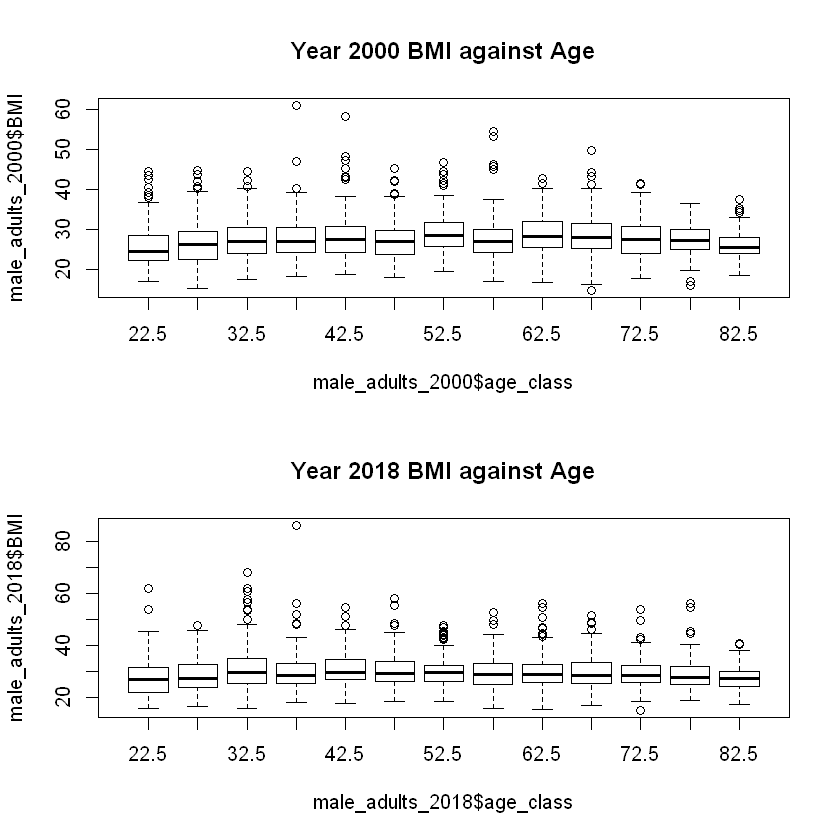

In [123]:
par(mfrow = c(2, 1))

boxplot(male_adults_2000$BMI ~ male_adults_2000$age_class,
       main = "Year 2000 BMI against Age")

boxplot(male_adults_2018$BMI ~ male_adults_2018$age_class,
       main = "Year 2018 BMI against Age")

par(mfrow = c(1, 1))

There seem to be some differences between years, and some age trend, but the differences in the medians among groups are very limited compared with the variation within each of these groups (Boxplots do a good job showing just that, think about the air pollution assignment from a few weeks ago).

Let’s now examine to what extent the level of obesity (% of people with a bmi > 30) differs among age classes and the extent to which levels of obesity changed from 2000 till 2018. Calculate per 1-year age class the percentage of people that are obese (bmi > 30).

### Step 8: Calculate the number of >20 year old men per age class

Use table() to get the number of men in each age class, separately for 2000 and 2018.

In [135]:
print("Year 2000:")
table1 <- table(male_adults_2000$age_class)
table1

print("Year 2018:")
table2 <- table(male_adults_2018$age_class)
table2

[1] "Year 2000:"



22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5 
 154  148  161  166  182  132  141  110  186  164  143  105   85 

[1] "Year 2018:"



22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5 
 185  186  195  163  175  191  195  209  310  217  181  115  171 

### Step 9: Get the number of obese men in each age class

Subset the data frames adult_2000_men and adult_2018_men for men with bmi >= 30 and then use table() to get the number of obese men in each age class, separately for 2000 and 2018.

In [138]:
male_adults_2000_new <- male_adults_2000[male_adults_2000$BMI >= 30, ]

male_adults_2018_new <- male_adults_2018[male_adults_2018$BMI >= 30, ]

table1_new <- table(male_adults_2000_new$age_class)
table1_new

table2_new <- table(male_adults_2018_new$age_class)
table2_new


22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5 
  27   32   45   49   54   32   47   29   64   59   39   27    8 


22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5 
  59   74   90   62   81   83   89   82  114   87   75   43   43 

### Step 10: Calculate for each age class the percentage of men with a bmi >= 30.

Do this separately for the 2000 and the 2018 data, using the tables you created in steps 8 and 9. (Hint: you can perform element-wise arithmetic on R tables.).

In [142]:
df <- data.frame(matrix(ncol = 2, nrow = 13))

colnames <- sort(unique(male_adults_2000$age_class, na.rm = TRUE))

rownames(df) <- sort(unique(male_adults_2000$age_class, na.rm = TRUE))
colnames(df) <- c("Year2000", "Year2018")

for (i in 1:13) {
    df$Year2000[i] <- table1_new[i] / sum(male_adults_2000$age_class == colnames[i], na.rm = TRUE) * 100
    df$Year2018[i] <- table2_new[i] / sum(male_adults_2018$age_class == colnames[i], na.rm = TRUE) * 100
}
df

# OTHERWISE, THIS CAN ALSO BE TRIED

table3 <- table1_new / table1 * 100
table3

table4 <- table2_new / table2 * 100
table4

,Year2000,Year2018
22.5,17.532468,31.89189
27.5,21.621622,39.78495
32.5,27.950311,46.15385
37.5,29.518072,38.03681
42.5,29.670330,46.28571
47.5,24.242424,43.45550
52.5,33.333333,45.64103
57.5,26.363636,39.23445
62.5,34.408602,36.77419
67.5,35.975610,40.09217



     22.5      27.5      32.5      37.5      42.5      47.5      52.5      57.5 
17.532468 21.621622 27.950311 29.518072 29.670330 24.242424 33.333333 26.363636 
     62.5      67.5      72.5      77.5      82.5 
34.408602 35.975610 27.272727 25.714286  9.411765 


    22.5     27.5     32.5     37.5     42.5     47.5     52.5     57.5 
31.89189 39.78495 46.15385 38.03681 46.28571 43.45550 45.64103 39.23445 
    62.5     67.5     72.5     77.5     82.5 
36.77419 40.09217 41.43646 37.39130 25.14620 

### Step 11: Plot the percentage of people that are obese as function of age_class in a scatter plot.

Use a different color for the points of each of the two years. Add for each year a lowess curve. Tip: Plot the points for one of the years, then add the points of the other year and finally add the lowess curves of both years. However, first get a list of the age classes, which you will use as x-variable

In [146]:
age_ranges <- sort(unique(male_adults_2000$age_class))
age_ranges 

[1] 22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5

Then define highest and lowest percentages of obese men in any of the age classes across all years

In [158]:
min_obese <- min(table3, table4)
min_obese
max_obese <- max(table3, table4)
max_obese

[1] 9.411765

[1] 46.28571

And then finally plot the data

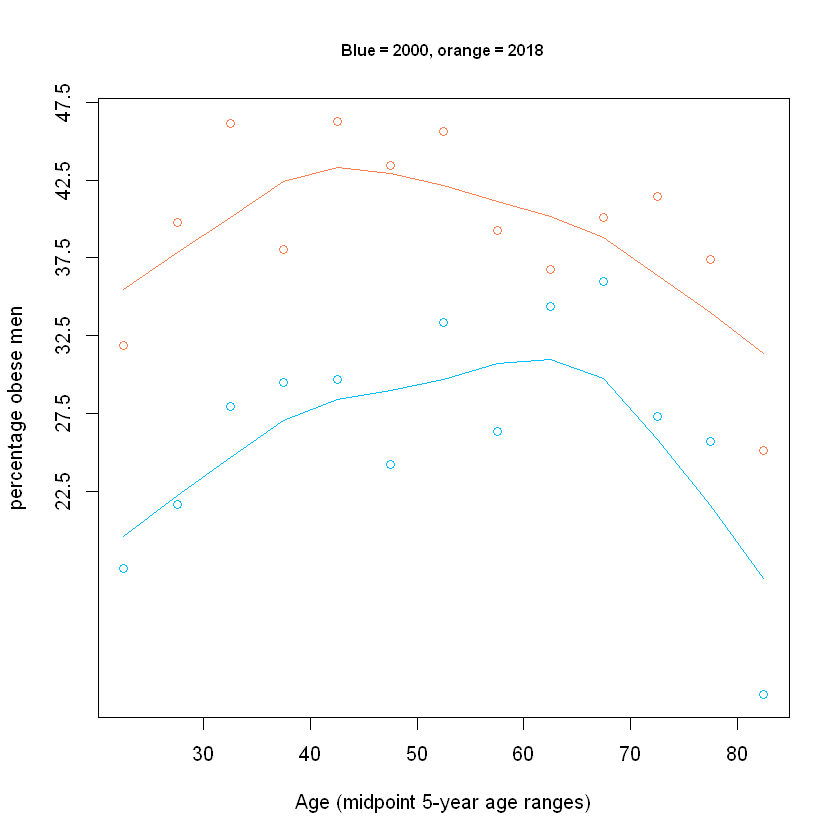

In [160]:
# plot(x, y, ...) where x and y are coordinates

plot(age_ranges, table3, 
     ylim = c(min_obese, max_obese),
     col  = "deepskyblue", 
     type = "p",
     xlab = "Age (midpoint 5-year age ranges)",
     ylab = "percentage obese men",
     main = "Blue = 2000, orange = 2018", cex.main = 0.8)

points(age_ranges, table4, col = "coral", type = "p")

lines(lowess(age_ranges, table3), col="deepskyblue")

lines(lowess(age_ranges, table4), col="coral")

Conclusions? There seems to be an similar unimodal age-related trend, although prevalence of obesity shifted from men in their sixties towards men in their late thirties / early forties. Overall, the percentage of mean with obesity increased with around 10% over the 2000-2018 time interval!